In [ ]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision import transforms

## Splitting data, setting up the model and plotting graphs with first 20 items and the rest as validation set

In [ ]:
mnist_dataset = datasets.MNIST(
    root = "datasets",
    train = True,
    download=True,
    transform = ToTensor()
)

In [ ]:
train_dataset = []
validation_dataset = []

for j, item in enumerate(mnist_dataset):
        if j < 20:
          train_dataset.append(item)
        else:
          validation_dataset.append(item)

In [ ]:
len(validation_dataset)

59980

In [ ]:
train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=20,
        drop_last=False,
        shuffle=True,
        num_workers=0)

valid_loader = DataLoader(
        dataset=validation_dataset,
        batch_size=20,
        shuffle=False,
        num_workers=0)

In [ ]:
class MNISTClassifier(torch.nn.Module):

    def __init__(self, num_features, num_hidden1, num_hidden2, num_classes):
        super().__init__()

        self.num_classes = num_classes

        self.model = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden1),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden1, num_hidden2),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden2, num_classes)
            )

    def forward(self, x):
        return self.model(x)


model = MNISTClassifier(num_features=28*28,
            num_hidden1=50,
            num_hidden2=20,
            num_classes=10)


optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
def compute_accuracy(model, data_loader):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i, (features, targets) in enumerate(data_loader):

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


In [ ]:
train_acc_list, valid_acc_list = [], []

for epoch in range(200):

  for batch_idx, (features, targets) in enumerate(train_loader):

    logits = model(features)
    loss = torch.nn.functional.cross_entropy(logits, targets)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  print(f"Epoch {epoch + 1} : loss - {loss}")

  with torch.no_grad():
    train_acc = compute_accuracy(model, train_loader)
    valid_acc = compute_accuracy(model, valid_loader)
    train_acc_list.append(train_acc.item())
    valid_acc_list.append(valid_acc.item())


Epoch 1 : loss - 2.273500919342041
Epoch 2 : loss - 2.2662720680236816
Epoch 3 : loss - 2.2597827911376953
Epoch 4 : loss - 2.2535927295684814
Epoch 5 : loss - 2.247537612915039
Epoch 6 : loss - 2.241497278213501
Epoch 7 : loss - 2.2353029251098633
Epoch 8 : loss - 2.229020118713379
Epoch 9 : loss - 2.22263765335083
Epoch 10 : loss - 2.216282367706299
Epoch 11 : loss - 2.2096166610717773
Epoch 12 : loss - 2.202549695968628
Epoch 13 : loss - 2.1953721046447754
Epoch 14 : loss - 2.1881895065307617
Epoch 15 : loss - 2.180872917175293
Epoch 16 : loss - 2.1733288764953613
Epoch 17 : loss - 2.1654722690582275
Epoch 18 : loss - 2.1572177410125732
Epoch 19 : loss - 2.1487886905670166
Epoch 20 : loss - 2.1400437355041504
Epoch 21 : loss - 2.1311264038085938
Epoch 22 : loss - 2.122016429901123
Epoch 23 : loss - 2.112189769744873
Epoch 24 : loss - 2.1021981239318848
Epoch 25 : loss - 2.0918984413146973
Epoch 26 : loss - 2.081373691558838
Epoch 27 : loss - 2.070620059967041
Epoch 28 : loss - 2.059

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_accuracy(train_acc_list, valid_acc_list):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs+1),
             train_acc_list, label='Training')
    plt.plot(np.arange(1, num_epochs+1),
             valid_acc_list, label='Validation')
    # plt.plot(np.arange(1, num_epochs+1),
    #          test_acc_list, label='Test')


    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()


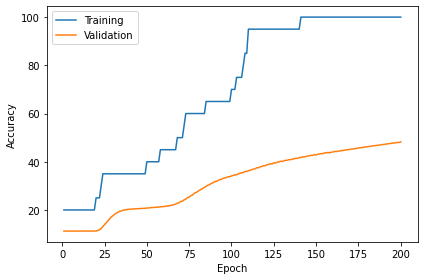

In [ ]:
plot_accuracy(train_acc_list, valid_acc_list)

## Here we can see that the accuracies at the end of 200 epochs are 100% for training and almost 45% to 50% for validation set. We can see this a clear case of overfitting, the reason being there are only 20 items for training data and the model was not able to generalise thereby overfitting and memorising the training 20 samples.

## Augmenting the data and training the model and plotting the results

In [ ]:

augmented_train_data = []

my_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor(),
])


for i in range(100):
    mnist_new = datasets.MNIST('data', train=True, download=True, transform=my_transform)
    for j, item in enumerate(mnist_new):
        if j >= 20:
            break
        augmented_train_data.append(item)

len(augmented_train_data)

2000

In [ ]:
train_loader = DataLoader(
        dataset=augmented_train_data,
        batch_size=20,
        drop_last=False,
        shuffle=True,
        num_workers=0)


In [ ]:
model_augmented = MNISTClassifier(num_features=28*28,
            num_hidden1=50,
            num_hidden2=20,
            num_classes=10)


optimizer = torch.optim.SGD(model_augmented.parameters(), lr=0.05)

In [ ]:
train_acc_list, valid_acc_list = [], []

for epoch in range(200):

  for batch_idx, (features, targets) in enumerate(train_loader):

    logits = model_augmented(features)
    loss = torch.nn.functional.cross_entropy(logits, targets)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  print(f"Epoch {epoch + 1} : loss - {loss}")

  with torch.no_grad():
    train_acc = compute_accuracy(model_augmented, train_loader)
    valid_acc = compute_accuracy(model_augmented, valid_loader)
    train_acc_list.append(train_acc.item())
    valid_acc_list.append(valid_acc.item())


Epoch 1 : loss - 1.4949709177017212
Epoch 2 : loss - 0.5933522582054138
Epoch 3 : loss - 0.17367130517959595
Epoch 4 : loss - 0.07415150105953217
Epoch 5 : loss - 0.025140877813100815
Epoch 6 : loss - 0.028671782463788986
Epoch 7 : loss - 0.017751967534422874
Epoch 8 : loss - 0.013562297448515892
Epoch 9 : loss - 0.006646392401307821
Epoch 10 : loss - 0.007758378051221371
Epoch 11 : loss - 0.005335135851055384
Epoch 12 : loss - 0.003506205976009369
Epoch 13 : loss - 0.0034095991868525743
Epoch 14 : loss - 0.0029313373379409313
Epoch 15 : loss - 0.002081753686070442
Epoch 16 : loss - 0.002574005862697959
Epoch 17 : loss - 0.00266580143943429
Epoch 18 : loss - 0.0019809151999652386
Epoch 19 : loss - 0.0022191740572452545
Epoch 20 : loss - 0.0029121118132025003
Epoch 21 : loss - 0.0019288432085886598
Epoch 22 : loss - 0.0017912887269631028
Epoch 23 : loss - 0.0009159217588603497
Epoch 24 : loss - 0.0019340630387887359
Epoch 25 : loss - 0.0011556936660781503
Epoch 26 : loss - 0.00164604349

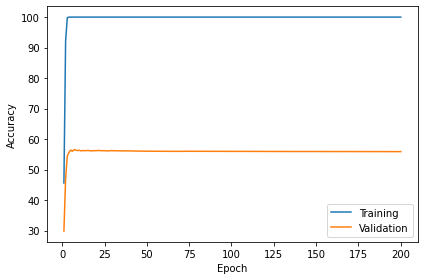

In [ ]:
plot_accuracy(train_acc_list, valid_acc_list)

## Even in this, with the augmentation the training accuracy becomes 100% whereas the validation accuracy is almost 60%, a signmificant improvement from the previous case but it is still overfitting.

## We can see that augmenting data and increasing the training set size has reduced overfitting and helped in generalising the model but the difference between training and validation accuracies is still large and the model is still overfitting.